In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
raw_df = pd.read_excel('Harvard.xlsx')

In [6]:
raw_df.head()

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,Median Age,% Male,% Female,% Bachelors Degree or Higher
0,MITx,6.002x,2012-05-09 00:00:00,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",15.04,8.32,54.98,83.20,8.17,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,14.27,9.22,64.05,89.14,14.38,28.0,83.50,16.50,63.04
2,MITx,3.091x,2012-09-10 00:00:00,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",17.13,12.49,72.85,87.49,14.42,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,9.96,1.11,11.11,0.00,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",20.44,9.64,47.12,77.45,15.98,32.0,56.78,43.22,88.33


In [8]:
raw_df.shape

(289, 15)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Institution                                   289 non-null    object 
 1   Course Number                                 289 non-null    object 
 2   Launch Date                                   289 non-null    object 
 3   Course Title                                  289 non-null    object 
 4   Instructors                                   288 non-null    object 
 5   Course Subject                                289 non-null    object 
 6   % Audited                                     289 non-null    float64
 7   % Certified                                   289 non-null    float64
 8   % Certified of > 50% Course Content Accessed  289 non-null    float64
 9   % Played Video                                289 non-null    flo

In [10]:
raw_df.isnull().sum()

Institution                                     0
Course Number                                   0
Launch Date                                     0
Course Title                                    0
Instructors                                     1
Course Subject                                  0
% Audited                                       0
% Certified                                     0
% Certified of > 50% Course Content Accessed    0
% Played Video                                  0
% Posted in Forum                               0
Median Age                                      0
% Male                                          0
% Female                                        0
% Bachelors Degree or Higher                    0
dtype: int64

In [12]:
raw_df.columns

Index(['Institution', 'Course Number', 'Launch Date', 'Course Title',
       'Instructors', 'Course Subject', '% Audited', '% Certified',
       '% Certified of > 50% Course Content Accessed', '% Played Video',
       '% Posted in Forum', 'Median Age', '% Male', '% Female',
       '% Bachelors Degree or Higher'],
      dtype='object')

In [14]:
selected_columns_df = raw_df[['% Audited', '% Certified',
       '% Certified of > 50% Course Content Accessed', '% Played Video',
       '% Posted in Forum', 'Median Age', '% Male', '% Female',
       '% Bachelors Degree or Higher']]

In [16]:
# filtered the numerical features
selected_columns_df

,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,Median Age,% Male,% Female,% Bachelors Degree or Higher
0,15.04,8.32,54.98,83.20,8.17,26.0,88.28,11.72,60.68
1,14.27,9.22,64.05,89.14,14.38,28.0,83.50,16.50,63.04
2,17.13,12.49,72.85,87.49,14.42,27.0,70.32,29.68,58.76
3,9.96,1.11,11.11,0.00,0.00,28.0,80.02,19.98,58.78
4,20.44,9.64,47.12,77.45,15.98,32.0,56.78,43.22,88.33
...,...,...,...,...,...,...,...,...,...
284,49.59,3.25,6.56,80.81,8.78,38.0,56.82,43.18,74.66
285,9.30,0.70,7.49,70.11,0.00,34.0,25.24,74.76,82.31
286,24.74,1.24,5.03,12.27,4.72,24.0,91.17,8.83,61.32
287,14.54,0.56,3.85,0.00,3.84,25.0,93.44,6.56,72.31


In [18]:
from sklearn import preprocessing
#Scale the data to suppress the effect of variables with higher scale / variables in different units
scaler = preprocessing.StandardScaler().fit(selected_columns_df)
scaled_df = pd.DataFrame(scaler.fit_transform(selected_columns_df),columns=selected_columns_df.columns, index=selected_columns_df.index)

In [20]:
scaled_df.head()

,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,Median Age,% Male,% Female,% Bachelors Degree or Higher
0,-0.624106,0.077816,1.197037,1.432542,-0.151616,-0.814682,1.341414,-1.341414,-1.112246
1,-0.672610,0.206906,1.657041,1.874239,0.678499,-0.320573,1.039626,-1.039626,-0.882126
2,-0.492452,0.675932,2.103352,1.751545,0.683846,-0.567627,0.207496,-0.207496,-1.299461
3,-0.944107,-0.956336,-1.027921,-4.754180,-1.243731,-0.320573,0.819913,-0.819913,-1.297511
4,-0.283947,0.267148,0.798401,1.004974,0.892377,0.667646,-0.647362,0.647362,1.583858


In [22]:
#Clustering
from sklearn.cluster import KMeans

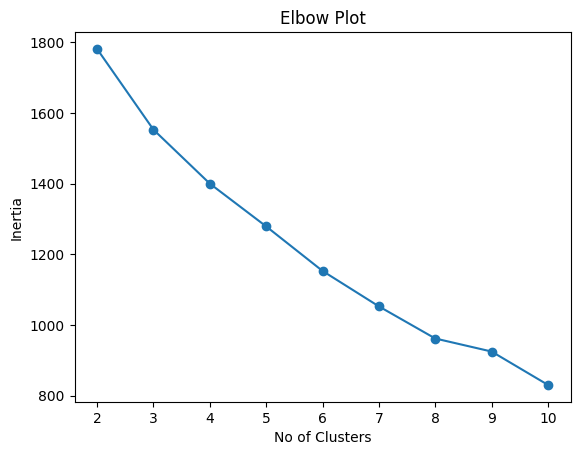

In [24]:
#Elbow Plot
inertial_values = [] #sum of squared distances to the nearest centroid
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    inertial_values.append(kmeans.inertia_)

#plotiing the elbow plot
plt.plot(k_values, inertial_values, marker = 'o')
plt.title('Elbow Plot')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
#seems k = 4 is good for analysis

In [26]:
# Silhouette Score
from sklearn.metrics import silhouette_score

In [28]:
silhouette_scores = []
k_values = range(2,10)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(scaled_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_df, labels)
    silhouette_scores.append(silhouette_avg)
    print('For K = ', k , 'The Silhouette Score is ',silhouette_avg)

    optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print('==========================================================')
print('The Optimal number of cluster is : ',optimal_k)

For K =  2 The Silhouette Score is  0.27471854295412956
For K =  3 The Silhouette Score is  0.20933877139226686
For K =  4 The Silhouette Score is  0.19141356186441996
For K =  5 The Silhouette Score is  0.18386201795107018
For K =  6 The Silhouette Score is  0.18298645095454624
For K =  7 The Silhouette Score is  0.18042910514635901
For K =  8 The Silhouette Score is  0.22439327615181334
For K =  9 The Silhouette Score is  0.23098717256381646
The Optimal number of cluster is :  2


In [30]:
# =============================================================================
# Create Clusters using the k-identified
# =============================================================================
k=4
from sklearn.cluster import KMeans
cluster_model=KMeans(n_clusters=k,random_state=10).fit(scaled_df)
print("Model",cluster_model)

Model KMeans(n_clusters=4, random_state=10)


In [32]:
print("Model",cluster_model.labels_)

Model [2 2 2 1 3 2 2 0 2 2 0 2 2 0 1 2 2 2 2 2 2 3 2 3 3 1 2 1 2 3 0 1 0 3 3 1 2
 1 0 2 2 0 2 1 2 3 2 0 3 3 0 3 3 2 1 0 2 2 0 1 0 1 2 2 2 1 0 1 2 3 0 1 2 0
 3 3 0 3 0 1 2 2 2 2 3 1 0 3 0 2 0 3 1 0 2 0 2 0 1 0 0 3 2 3 2 1 2 1 2 1 3
 1 1 2 1 1 0 2 1 1 2 2 3 1 3 1 2 1 2 2 2 3 2 3 1 1 3 1 3 3 3 3 1 3 3 3 2 1
 1 1 2 2 2 2 1 3 0 3 2 0 2 1 2 1 1 3 0 3 0 0 0 3 3 0 3 0 2 1 2 1 1 1 1 2 3
 0 0 0 2 1 1 3 0 1 3 1 2 2 0 2 0 3 0 3 2 2 0 3 2 2 1 3 3 1 1 2 1 0 1 3 1 1
 0 1 1 3 1 0 3 3 1 1 3 1 1 1 2 3 1 1 1 2 0 1 3 1 1 2 1 1 3 1 2 3 3 3 2 3 3
 3 1 1 1 3 3 3 3 3 2 1 2 1 3 2 1 2 3 1 2 1 1 1 3 3 3 3 1 1 1]


In [34]:
# =============================================================================
# Add cluster details to the original data
# =============================================================================
raw_df['cluster_id'] = cluster_model.labels_

In [36]:
raw_df

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,Median Age,% Male,% Female,% Bachelors Degree or Higher,cluster_id
0,MITx,6.002x,2012-05-09 00:00:00,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",15.04,8.32,54.98,83.20,8.17,26.0,88.28,11.72,60.68,2
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,14.27,9.22,64.05,89.14,14.38,28.0,83.50,16.50,63.04,2
2,MITx,3.091x,2012-09-10 00:00:00,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",17.13,12.49,72.85,87.49,14.42,27.0,70.32,29.68,58.76,2
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,9.96,1.11,11.11,0.00,0.00,28.0,80.02,19.98,58.78,1
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",20.44,9.64,47.12,77.45,15.98,32.0,56.78,43.22,88.33,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,HarvardX,MUS24.4x,07/21/2016,First Nights: Symphonie Fantastique,Tom Kelly,"Humanities, History, Design, Religion, and Edu...",49.59,3.25,6.56,80.81,8.78,38.0,56.82,43.18,74.66,3
285,HarvardX,GSE4x,07/25/2016,Introduction to Family Engagement in Education,Karen Mapp,"Humanities, History, Design, Religion, and Edu...",9.30,0.70,7.49,70.11,0.00,34.0,25.24,74.76,82.31,3
286,MITx,6.302.0x,2016-01-08 00:00:00,Introduction to Control System Design,"Jacob White, Joe Steinmeyer","Science, Technology, Engineering, and Mathematics",24.74,1.24,5.03,12.27,4.72,24.0,91.17,8.83,61.32,1
287,MITx,6.302.1x,2016-01-08 00:00:00,Introduction to State Space Control,"Jacob White, Joe Steinmeyer","Science, Technology, Engineering, and Mathematics",14.54,0.56,3.85,0.00,3.84,25.0,93.44,6.56,72.31,1


In [40]:
#Write the results for making interpretaions
raw_df.to_excel('suppliers_clustered_data-k4.xlsx',index=False)

In [42]:
# =============================================================================
# Profile Clusters
# =============================================================================
centroids=cluster_model.cluster_centers_
column_names= selected_columns_df.columns.tolist()
cluster_profile_df=pd.DataFrame(centroids,columns=column_names)
print(cluster_profile_df)

   % Audited  % Certified  % Certified of > 50% Course Content Accessed  \
0   0.738323     1.747315                                      1.113321   
1  -0.470593    -0.742374                                     -0.719398   
2  -0.473746    -0.075920                                      0.571962   
3   0.619269    -0.129251                                     -0.480081   

   % Played Video  % Posted in Forum  Median Age    % Male  % Female  \
0        0.172631           1.117472    0.783117 -0.915923  0.915923   
1       -0.660801          -0.714951   -0.868637  0.994073 -0.994073   
2        0.563550           0.153242   -0.300989  0.162100 -0.162100   
3        0.045102          -0.023903    0.867961 -0.778975  0.778975   

   % Bachelors Degree or Higher  
0                      0.465544  
1                     -0.820942  
2                     -0.152562  
3                      0.844825  


In [44]:
#Write to an excel file for reading this
cluster_profile_df.to_excel('suppliers_cluster_profile-k4.xlsx',index=True)